In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

In [6]:
def plot_learning_curve(log_folder="logs"):
    files = glob.glob(os.path.join(log_folder, "*.monitor.csv"))
    
    data_frames = []

    print(f"Found {len(files)} log files. Processing...")

    for file in files:
        df = pd.read_csv(file, skiprows=1)
            
        df.columns = [c.strip() for c in df.columns]
        
        if 'r' not in df.columns or 'l' not in df.columns:
            print(f"Skipping {file}: 'r' or 'l' column missing.")
            continue

        # Timesteps = cumulative episode lengths
        df['Timesteps'] = df['l'].cumsum()
        df['Reward'] = df['r']
        
        data_frames.append(df)

    full_df = pd.concat(data_frames, ignore_index=True)

    plt.figure(figsize=(10, 6))
    sns.set_theme(style="darkgrid")

    sns.lineplot(
        data=full_df, 
        x='Timesteps', 
        y='Reward', 
        errorbar='sd'    # Mean ± Std across seeds
    )

    plt.title("TD3 on Cartpole-Swingup (Mean ± Std over 3 Seeds)", fontsize=14)
    plt.xlabel("Total Timesteps", fontsize=12)
    plt.ylabel("Episode Reward", fontsize=12)

    plt.axhline(y=600, linestyle='--', label='High Performance Threshold')

    plt.legend()
    plt.tight_layout()

    output_filename = "td3_eval.png"
    plt.savefig(output_filename, dpi=500)
    print(f"Plot saved as {output_filename}")
    
    plt.show()


Found 3 log files. Processing...
Plot saved as td3_eval.png


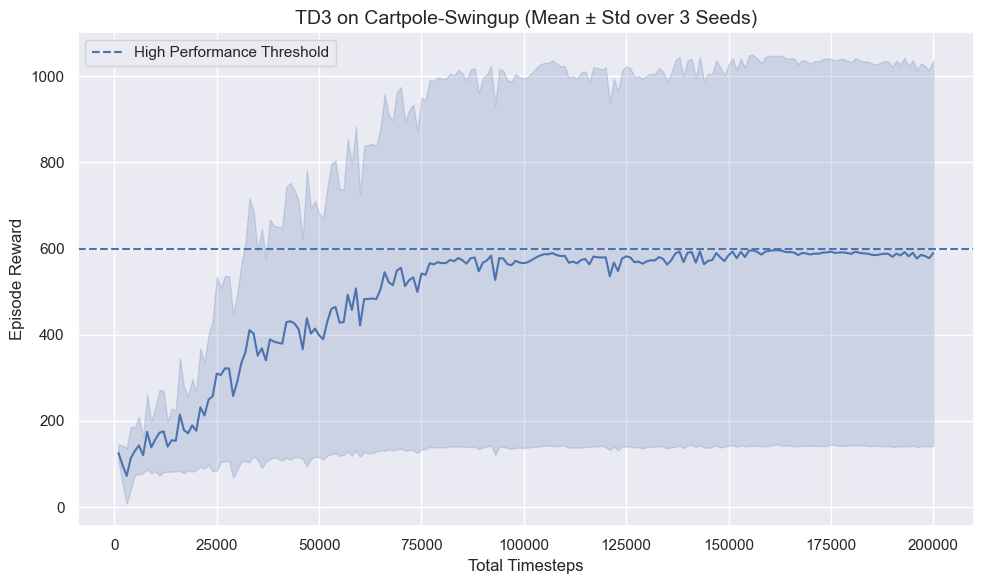

In [7]:
plot_learning_curve()